# Cleaning data and the skies

## 📖 Background
Your are a data analyst at an environmental company. Your task is to evaluate ozone pollution across various regions.

You’ve obtained data from the U.S. Environmental Protection Agency (EPA), containing daily ozone measurements at monitoring stations across California. However, like many real-world datasets, it’s far from clean: there are missing values, inconsistent formats, potential duplicates, and outliers.

Before you can provide meaningful insights, you must clean and validate the data. Only then can you analyze it to uncover trends, identify high-risk regions, and assess where policy interventions are most urgently needed.

## 💾 The data
The data is a modified dataset from the U.S. Environmental Protection Agency ([EPA](https://www.epa.gov/outdoor-air-quality-data/download-daily-data)). 

#### Ozone contains the daily air quality summary statistics by monitor for the state of California for 2024. Each row contains the date and the air quality metrics per collection method and site
- "Date" - the calendar date with which the air quality values are associated
- "Source" - the data source: EPA's Air Quality System (AQS), or Airnow reports
- "Site ID" - the id for the air monitoring site
- "POC" - the id number for the monitor
- "Daily Max 8-hour Ozone Concentration" - the highest 8-hour value of the day for ozone concentration
- "Units" - parts per million by volume (ppm)
- "Daily AQI Value" - the highest air quality index value for the day, telling how clean or polluted the air is (a value of 50 represents good air quality, while a value above 300 is hazardous)
- "Local Site Name" - name of the monitoring site
- "Daily Obs Count" - number of observations reported in that day
- "Percent Complete" - indicates whether all expected samples were collected
- "Method Code" - identifier for the collection method
- "CBSA Code" - identifier for the core base statistical area (CBSA)
- "CBSA Name" - name of the core base statistical area
- "State FIPS Code" - identifier for the state
- "State" - name of the state
- "County FIPS Code" - identifer for the county
- "County" - name of the county
- "Site Latitude" - latitude coordinates of the site
- "Site Longitude" - longitude coordinates of the side

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ozone = pd.read_csv('ozone.csv')
ozone.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,/2024,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,01/02/2024,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,/2024,AQS,60010007,1,NaN,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,January 04/2024,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,January 05/2024,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


In [4]:
#ozone.to_csv('ozone.csv', index=False)

In [5]:
#Check shape of data
ozone.shape

(54759, 17)

## Observations
- There are 54,759 rows and 17 columns

In [6]:
ozone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54759 entries, 0 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  54759 non-null  object 
 1   Source                                54759 non-null  object 
 2   Site ID                               54759 non-null  int64  
 3   POC                                   54759 non-null  int64  
 4   Daily Max 8-hour Ozone Concentration  52021 non-null  float64
 5   Units                                 54759 non-null  object 
 6   Daily AQI Value                       52021 non-null  float64
 7   Local Site Name                       54759 non-null  object 
 8   Daily Obs Count                       54759 non-null  int64  
 9   Percent Complete                      54759 non-null  float64
 10  Method Code                           48269 non-null  float64
 11  CBSA Code      

### Observations
- Date: is object and might need to be converted to datetime appears to have no missing values
- Source: Object and has no missing values
- Site ID: Object and has no missing values
- POC: Int and has no missing values
- Daily Max 8-hour Ozone Concentration is float and HAS missing values
- Units: Object and has no missing values
- Daily AQI Value: float and HAS missing values
- Local Site Name: Object and has no missing values
- Daily Obs Count: Object and has no missing values
- Percent Complete: Float and no missing values
- Method Code: Float and HAS several missing values
- CBSA Code: Float and HAS missing values
- CBSA Name: Object and HAS missing values
- County FIPS Code: Int and has no missing values
- County: Object and has no missing values
- Site Latitude: Float and no missing values
- Site Longitude: Float and no missing values

In [7]:
#Check number of missing values per column
ozone.isna().sum()

Date                                       0
Source                                     0
Site ID                                    0
POC                                        0
Daily Max 8-hour Ozone Concentration    2738
Units                                      0
Daily AQI Value                         2738
Local Site Name                            0
Daily Obs Count                            0
Percent Complete                           0
Method Code                             6490
CBSA Code                               2408
CBSA Name                               2408
County FIPS Code                           0
County                                     0
Site Latitude                              0
Site Longitude                             0
dtype: int64

In [8]:
# Make a copy of df before begining data manipulation in case I have to revert back. 
oz = ozone.copy()

In [9]:
# Check value_counts() of Daily Max 8-hour Ozone Concentration
oz['Daily Max 8-hour Ozone Concentration'].value_counts()

Daily Max 8-hour Ozone Concentration
0.040    1851
0.039    1806
0.038    1766
0.042    1753
0.037    1742
         ... 
0.120       1
0.139       1
0.131       1
0.127       1
0.118       1
Name: count, Length: 124, dtype: int64

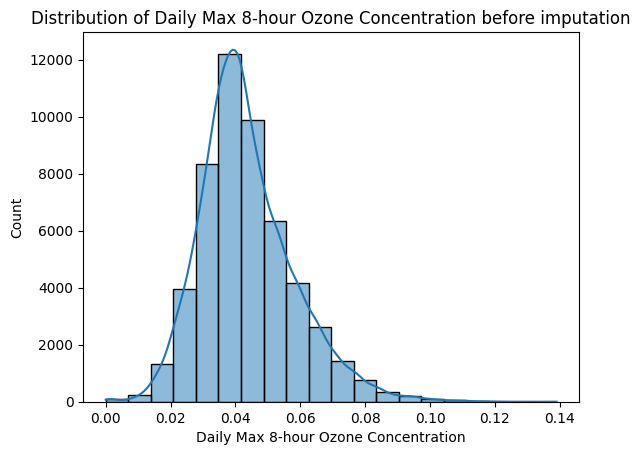

In [10]:
# Use histogram to check distribution of Daily Max 8-hour Ozone Concentration
sns.histplot(data=oz, x='Daily Max 8-hour Ozone Concentration',bins=20,kde=True) #kde=True
plt.title('Distribution of Daily Max 8-hour Ozone Concentration before imputation')
plt.show()

### Observation on Daily Max 8-hour Ozone Concentration
- Distribution is normal
- I can use the distribution with lambda function as an imputation method, which will have very littel effect on distribution of cleaned dataframe since imputation will follow distribution of the data.

In [11]:
# Check mean and median of Daily Max 8-hour Ozone Concentration
oz_mean = oz['Daily Max 8-hour Ozone Concentration'].mean()
oz_median = oz['Daily Max 8-hour Ozone Concentration'].median()

print(f'Mean of oz 8hr max concentration is {round(oz_mean,3)} and median of is {oz_median}')

Mean of oz 8hr max concentration is 0.044 and median of is 0.041


### Observation on mean and median of oz 8h max concentration
- Mean and median are close which is expected since distribution is nearly normal. 

In [12]:
# Imputation of Daily Max 8-hour Ozone Concentration using distribution of the column.

#Drop null values in oz['Daily Max 8-hour Ozone Concentration'] to get its distribution and use it with np.random.choice()
non_null_oz_8hr_max_concentration = oz['Daily Max 8-hour Ozone Concentration'].dropna()

In [13]:
# Check to make sure it worked
non_null_oz_8hr_max_concentration.isna().sum()

0

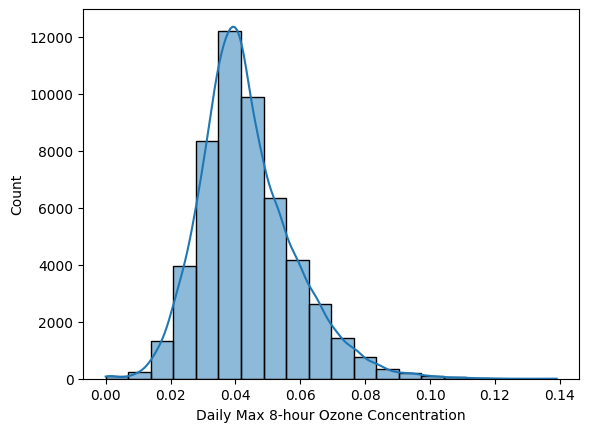

In [14]:
sns.histplot(non_null_oz_8hr_max_concentration, bins=20,kde=True)
plt.show()

In [15]:
# Imputation of max 8hr concentration
oz['Daily Max 8-hour Ozone Concentration'] = oz['Daily Max 8-hour Ozone Concentration'].apply(lambda x: np.random.choice(non_null_oz_8hr_max_concentration) if pd.isnull(x) else x)

In [16]:
# Check to see if it worked
oz['Daily Max 8-hour Ozone Concentration'].isna().sum()

0

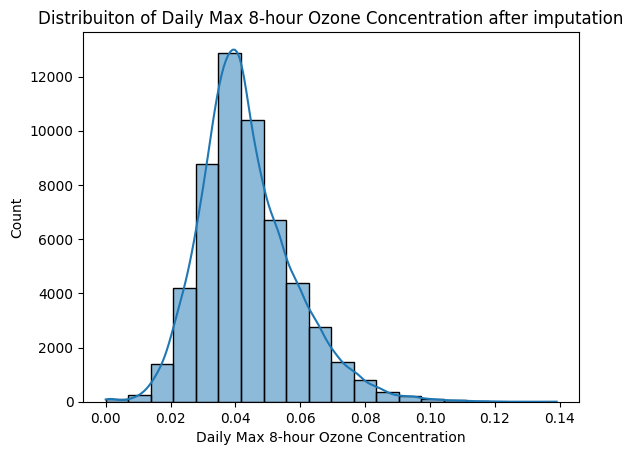

In [17]:
sns.histplot(oz['Daily Max 8-hour Ozone Concentration'], bins=20,kde=True)
plt.title('Distribuiton of Daily Max 8-hour Ozone Concentration after imputation')
plt.show()

In [18]:
# Checking imputed data's mean and median
# Check mean and median of Daily Max 8-hour Ozone Concentration
oz_mean = oz['Daily Max 8-hour Ozone Concentration'].mean()
oz_median = oz['Daily Max 8-hour Ozone Concentration'].median()

print(f'Mean of oz 8hr max concentration is {round(oz_mean,3)} and median of is {oz_median}')

Mean of oz 8hr max concentration is 0.044 and median of is 0.041


### Notes:
- Daily Max 8-hour Ozone Concentration missing values have been imputed based on the distribution of this column to help perserve data integrity.
- Daily Max 8-hour Ozone Concentration has no missing values. 

### 'Daily AQI Value' Data Validation

In [19]:
oz['Daily AQI Value'].isna().sum()

2738

In [20]:
oz['Daily AQI Value'].head(50)

0     29.0
1     34.0
2     30.0
3     24.0
4     25.0
5     29.0
6     28.0
7     25.0
8     31.0
9     33.0
10    29.0
11    25.0
12     NaN
13    31.0
14    25.0
15    15.0
16    31.0
17    20.0
18     8.0
19    31.0
20    31.0
21    31.0
22    29.0
23    26.0
24    30.0
25     NaN
26    31.0
27    28.0
28    20.0
29    19.0
30    29.0
31    25.0
32    19.0
33    26.0
34    32.0
35    24.0
36    24.0
37    25.0
38    28.0
39    21.0
40    24.0
41    25.0
42    14.0
43    19.0
44    29.0
45    31.0
46    29.0
47    29.0
48    25.0
49    28.0
Name: Daily AQI Value, dtype: float64

In [21]:
# Check value_counts() of Daily AQ
oz['Daily AQI Value'].value_counts()

Daily AQI Value
31.0     2960
44.0     2339
37.0     1861
36.0     1801
35.0     1753
         ... 
227.0       1
223.0       1
214.0       1
212.0       1
236.0       1
Name: count, Length: 120, dtype: int64

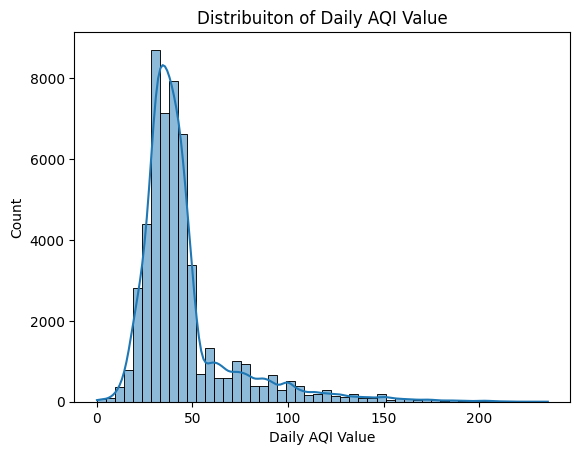

In [22]:
# Distribution of Daily AQI Value
sns.histplot(oz['Daily AQI Value'], bins=50,kde=True)
plt.title('Distribuiton of Daily AQI Value')
plt.show()

In [23]:
# Checking imputed data's mean and median
# Check mean and median of Daily Daily AQI Value
AQ_mean = oz['Daily AQI Value'].mean()
AQ_median = oz['Daily AQI Value'].median()

print(f'Mean of oz Daily AQI Value is {round(AQ_mean,3)} and median of is {AQ_median}')

Mean of oz Daily AQI Value is 45.28 and median of is 38.0


### Observation
- Mean and Median are fare from eachother
- Distribution of AQ is skewed right
- Median is a better estimate of central tendancy of the data

In [24]:
# Imputting with Median since data is skewed
oz['Daily AQI Value'].fillna(oz['Daily AQI Value'].median(),inplace=True)

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_5761/840923395.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oz['Daily AQI Value'].fillna(oz['Daily AQI Value'].median(),inplace=True)


In [25]:
oz['Daily AQI Value'].isna().sum()

0

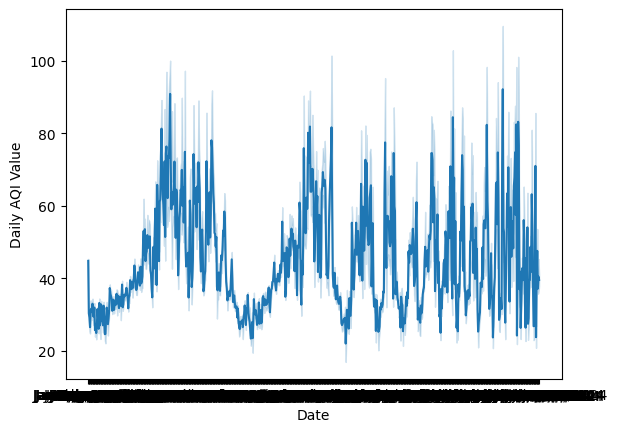

In [26]:
# Visulaizing relationship between Ozone concentration and Date
sns.lineplot(data= oz, x='Date', y='Daily AQI Value')
plt.show()

# Method Code cleaning

In [27]:
na_method = oz['Method Code'].isna().sum()

In [28]:
percent_method_na = na_method/(len(oz['Daily AQI Value']))

print(f'The percent of missing data from Method Code is {round(percent_method_na,2)*100}% bro')

The percent of missing data from Method Code is 12.0% bro


In [29]:
oz['Method Code'].value_counts(normalize=True)

Method Code
87.0     0.730842
47.0     0.177029
199.0    0.084008
53.0     0.008121
Name: proportion, dtype: float64

### Observation
- ~12% of data is missing from Method Code column.
- I will try more advanced imputation methods since this is almost 15% of the data in this column.
- There are 4 categories of Method Code

In [30]:
# Function to impute based on proportion observed in column
def impute_proportions_method(x):
    if pd.isnull(x):
        return np.random.choice([87,47,199,53], p=[0.7308417411,0.1770287348,0.0840083698,0.0081211544])
    return x

In [31]:
oz['Method Code'] = oz['Method Code'].apply(impute_proportions_method)

In [32]:
oz['Method Code'].isna().sum()

0

## CBSA Code Cleaning 

In [33]:
oz['CBSA Code'].value_counts(normalize=True)

CBSA Code
40140.0    0.137304
40900.0    0.096426
31080.0    0.096350
41860.0    0.067009
41740.0    0.061642
42200.0    0.061088
12540.0    0.054975
23420.0    0.048538
42020.0    0.041661
41940.0    0.035052
37100.0    0.035014
47300.0    0.024947
20940.0    0.022999
41500.0    0.021012
13860.0    0.019274
39820.0    0.018643
46700.0    0.018261
33700.0    0.013944
31460.0    0.013849
17020.0    0.013734
44700.0    0.013677
49700.0    0.011175
39780.0    0.011136
46380.0    0.008519
32900.0    0.007163
42100.0    0.007087
43760.0    0.006972
25260.0    0.006934
46020.0    0.006896
17340.0    0.006877
21700.0    0.006571
42220.0    0.005272
Name: proportion, dtype: float64

In [34]:
# Function for imputing missing data based on data distribution
# Function to impute based on proportion observed in column
def impute_proportions_CBSA_Code(x):
    if pd.isnull(x):
        return np.random.choice([40140,40900,31080,41860,41740,42200,12540,23420,42020,41940,37100,47300,20940,41500,13860,39820,46700,33700,31460,17020,44700,49700,39780,46380,32900,42100,43760,25260,46020,17340,21700,42220], p=[0.1373039675,0.0964260473,0.0963496399,0.0670092262,0.0616416114,0.0610876583,0.0549750721,0.0485377548,0.0416610953,0.0350518615,0.0350136578,0.0249469924,0.0229986056,0.0210120151,0.0192737484,0.0186433879,0.0182613513,0.0139443373,0.0138488281,0.0137342171,0.0136769116,0.0111745716,0.011136368,0.008519417,0.0071631869,0.0070867796,0.0069721686,0.006933965,0.0068957613,0.0068766595,0.0065710302,0.0052721056])
    return x

In [35]:
# Apply function to CBSA Code column to impute missing values based on distribution of data
oz['CBSA Code'] = oz['CBSA Code'].apply(impute_proportions_CBSA_Code)

In [36]:
oz.isna().sum()

Date                                       0
Source                                     0
Site ID                                    0
POC                                        0
Daily Max 8-hour Ozone Concentration       0
Units                                      0
Daily AQI Value                            0
Local Site Name                            0
Daily Obs Count                            0
Percent Complete                           0
Method Code                                0
CBSA Code                                  0
CBSA Name                               2408
County FIPS Code                           0
County                                     0
Site Latitude                              0
Site Longitude                             0
dtype: int64

### CBSA Name Cleaning

In [37]:
oz['CBSA Name'].value_counts(normalize=True)

CBSA Name
Riverside-San Bernardino-Ontario, CA             0.137304
Sacramento--Roseville--Arden-Arcade, CA          0.096426
Los Angeles-Long Beach-Anaheim, CA               0.096350
San Francisco-Oakland-Hayward, CA                0.067009
San Diego-Carlsbad, CA                           0.061642
Santa Maria-Santa Barbara, CA                    0.061088
Bakersfield, CA                                  0.054975
Fresno, CA                                       0.048538
San Luis Obispo-Paso Robles-Arroyo Grande, CA    0.041661
San Jose-Sunnyvale-Santa Clara, CA               0.035052
Oxnard-Thousand Oaks-Ventura, CA                 0.035014
Visalia-Porterville, CA                          0.024947
El Centro, CA                                    0.022999
Salinas, CA                                      0.021012
Bishop, CA                                       0.019274
Redding, CA                                      0.018643
Vallejo-Fairfield, CA                            0.018261
Mode

In [38]:
oz['CBSA Name'].dtype

dtype('O')

In [39]:
# Function for imputing missing data based on data distribution
# Function to impute based on proportion observed in column
def impute_proportions_CBSA_Name(x):
    if pd.isnull(x):
        return np.random.choice(['Riverside-San Bernardino-Ontario, CA','Sacramento--Roseville--Arden-Arcade, CA','Los Angeles-Long Beach-Anaheim, CA','San Francisco-Oakland-Hayward, CA','San Diego-Carlsbad, CA','Santa Maria-Santa Barbara, CA','Bakersfield, CA','Fresno, CA','San Luis Obispo-Paso Robles-Arroyo Grande, CA','San Jose-Sunnyvale-Santa Clara, CA','Oxnard-Thousand Oaks-Ventura, CA','Visalia-Porterville, CA','El Centro, CA','Salinas, CA','Bishop, CA','Redding, CA','Vallejo-Fairfield, CA','Modesto, CA','Madera, CA','Chico, CA','Stockton-Lodi, CA','Yuba City, CA','Red Bluff, CA','Ukiah, CA','Merced, CA','Santa Cruz-Watsonville, CA','Sonora, CA','Hanford-Corcoran, CA','Truckee-Grass Valley, CA','Clearlake, CA','Eureka-Arcata-Fortuna, CA','Santa Rosa, CA'], p=[0.1373039675,0.0964260473,0.0963496399,0.0670092262,0.0616416114,0.0610876583,0.0549750721,0.0485377548,0.0416610953,0.0350518615,0.0350136578,0.0249469924,0.0229986056,0.0210120151,0.0192737484,0.0186433879,0.0182613513,0.0139443373,0.0138488281,0.0137342171,0.0136769116,0.0111745716,0.011136368,0.008519417,0.0071631869,0.0070867796,0.0069721686,0.006933965,0.0068957613,0.0068766595,0.0065710302,0.0052721056])
    return x



In [40]:
# Apply function to CBSA Name column to impute missing values based on distribution of data
oz['CBSA Name'] = oz['CBSA Name'].apply(impute_proportions_CBSA_Name)

In [41]:
oz.isna().sum()

Date                                    0
Source                                  0
Site ID                                 0
POC                                     0
Daily Max 8-hour Ozone Concentration    0
Units                                   0
Daily AQI Value                         0
Local Site Name                         0
Daily Obs Count                         0
Percent Complete                        0
Method Code                             0
CBSA Code                               0
CBSA Name                               0
County FIPS Code                        0
County                                  0
Site Latitude                           0
Site Longitude                          0
dtype: int64

# All missing values have been imputed.

# Dealing with Data column

In [42]:
oz['Date'].sort_values()

0                    /2024
12726                /2024
28282                /2024
12730                /2024
12731                /2024
               ...        
11745    September 30/2024
5233     September 30/2024
35204    September 30/2024
46871    September 30/2024
20146    September 30/2024
Name: Date, Length: 54759, dtype: object

## Observations
- Data type of date is object.
- Dates are organized in sequential order.
- Over 9,000 rows have /24 as a value. However their value can be infered since Data before and after are available
- Data values are not standardized i.e. May 03/2024 vs 05/03/2024

## Next steps
1) Standardize all date values to be in numeric form 05/03/2024
2) Develop a function that imputes missing values with its logical value i.e.. 01/01/2024, /2024, 01/02/2024.

In [43]:
oz2 = oz.copy()

In [44]:
#Function is used to convert date values that are in the following format 'December 03/2024' to '12/03/2024' while not altering values that are
# '/2024' as I will need these values to infer their values later
def reformat_custom_date(date_str):
    if isinstance(date_str, str) and date_str.strip() == '/2024':
        return date_str  # Leave partial dates as-is
    try:
        parsed_date = pd.to_datetime(date_str, format='%B %d/%Y')
        return parsed_date.strftime('%m/%d/%Y') # reformat from %B %d/%Y to %m/%d/%Y
    except (ValueError, TypeError):
        return date_str  # Keep other unparseable strings for now


In [45]:
# Apply function
oz2['Date'] = oz2['Date'].apply(reformat_custom_date)


In [46]:
#Check data type
oz2['Date'].dtype

dtype('O')

In [47]:
# Function enumerates Dates preserves '/2024', tries inffereing from the data prior and adds 1 to create missing date, appends to fixed_dates list

from datetime import datetime, timedelta

def fix_sequential_dates(date_list):
    fixed_dates = []
    for i, date_str in enumerate(date_list):
        # Preserve partials and non-strings
        if isinstance(date_str, str) and date_str.strip() == '/2024':
            # Try inferring from the previous date
            if i > 0:
                prev = fixed_dates[-1]
                if isinstance(prev, str) and prev != '/2024':
                    try:
                        prev_date = datetime.strptime(prev, '%m/%d/%Y')
                        inferred_date = prev_date + timedelta(days=1)
                        fixed_dates.append(inferred_date.strftime('%m/%d/%Y'))
                        continue
                    except ValueError:
                        pass
            # Fallback: keep original partial
            fixed_dates.append(date_str)
        else:
            fixed_dates.append(date_str)
    return fixed_dates


In [48]:
oz2['Date'] = fix_sequential_dates(oz2['Date'].tolist())


In [49]:
# Check if function worked
oz2['Date'].sort_values()


0             /2024
45083    01/01/2024
45262    01/01/2024
11473    01/01/2024
37776    01/01/2024
            ...    
8188     12/31/2024
1336     12/31/2024
18230    12/31/2024
35296    12/31/2024
43443    12/31/2024
Name: Date, Length: 54759, dtype: object

## Observation
- Function work with the exception of one value
- I can infer that this value must be 01/01/2024 since the function used prior day to infer next value. Since the data starts on 01/01/2024 that means there is no prior date to this so function would not be able to infer this date.

In [50]:
# Replacing the one value that did not get cleaned
oz2['Date'] = oz2['Date'].replace('/2024','01/01/2024')

In [51]:
oz2['Date'].value_counts()

Date
06/30/2024    160
09/14/2024    160
07/01/2024    159
09/13/2024    158
09/28/2024    158
             ... 
03/19/2024    137
12/31/2024    136
01/01/2024    122
01/01/2025     23
01/02/2025      4
Name: count, Length: 368, dtype: int64

## Observation
- All date values have been imputed and there are no missing dates now
- Next I will convert it to datetime object

In [52]:
#Check data type
oz2['Date'].dtype

dtype('O')

In [53]:
# Still a datetime object internally
oz2['Date'] = pd.to_datetime(oz2['Date'], format='%m/%d/%Y')


In [54]:
oz2.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,2024-01-01,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,2024-01-02,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,2024-01-03,AQS,60010007,1,0.037,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,2024-01-04,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,2024-01-05,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


## Date is cleaned!

In [55]:
## Daily Max 8-hour Ozone Concentration (Done)
## Daily AQI Value (Done)
## Method Code (Done using proprotional imputation method)
## CBSA Code	(Done using proprotional imputation method)
## CBSA Name	 (Done using proprotional imputation method)
ozone[['Daily Max 8-hour Ozone Concentration','Date']].tail(5)

,Daily Max 8-hour Ozone Concentration,Date
54754,0.044,02/16/2024
54755,0.057,August 14/2024
54756,NaN,June 30/2024
54757,0.058,/2024
54758,NaN,July 22/2024


# 2. How does daily maximum 8-hour ozone concentration vary over time and regions?
# 3. Are there any areas that consistently show high ozone concentrations? Do different methods report different ozone levels?

## Ozone concentration over Time

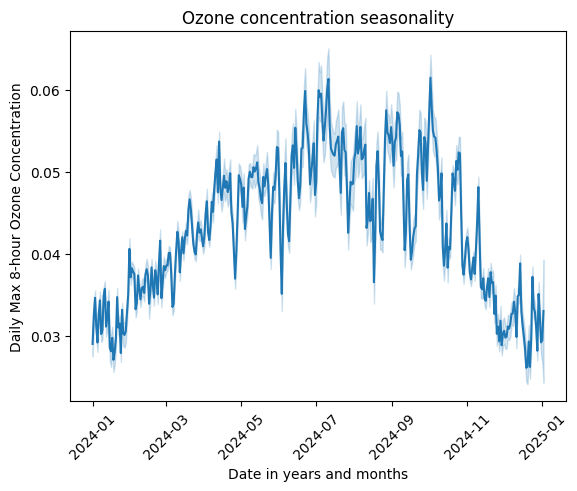

In [56]:
# Visulaizing relationship between Ozone concentration and Date
sns.lineplot(data= oz2, x='Date', y='Daily Max 8-hour Ozone Concentration')
plt.title('Ozone concentration seasonality')
plt.xlabel('Date in years and months')
plt.xticks(rotation = 45)
plt.show()

## Observations
- There is a clear seasonal trend with Ozone concentration peaking between July and October.
- Ozone levels hit lowest marks in cold months between December and Febuary.

 ## Note: There might be interference since data is collected from all over California and seasons vary by region. For example cold weather happens earlier the further north a place is located i.e. San Francisco vs San Diego. 

In [57]:
oz2.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,2024-01-01,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,2024-01-02,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,2024-01-03,AQS,60010007,1,0.037,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,2024-01-04,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,2024-01-05,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


In [58]:
oz2['CBSA Name'].value_counts()

CBSA Name
Riverside-San Bernardino-Ontario, CA             7519
Los Angeles-Long Beach-Anaheim, CA               5286
Sacramento--Roseville--Arden-Arcade, CA          5283
San Francisco-Oakland-Hayward, CA                3689
San Diego-Carlsbad, CA                           3367
Santa Maria-Santa Barbara, CA                    3323
Bakersfield, CA                                  2994
Fresno, CA                                       2682
San Luis Obispo-Paso Robles-Arroyo Grande, CA    2273
Oxnard-Thousand Oaks-Ventura, CA                 1927
San Jose-Sunnyvale-Santa Clara, CA               1902
Visalia-Porterville, CA                          1363
El Centro, CA                                    1261
Salinas, CA                                      1151
Bishop, CA                                       1051
Redding, CA                                      1024
Vallejo-Fairfield, CA                             996
Madera, CA                                        762
Stockton-Lodi, CA 

In [ ]:
# Group by cities average Oz level
Cities_oz = oz2.groupby('CBSA Name')['Daily Max 8-hour Ozone Concentration'].mean() # I should try geometric mean or tuncated mean as well

In [60]:
Cities_oz_sorted = Cities_oz.sort_values(ascending=False)

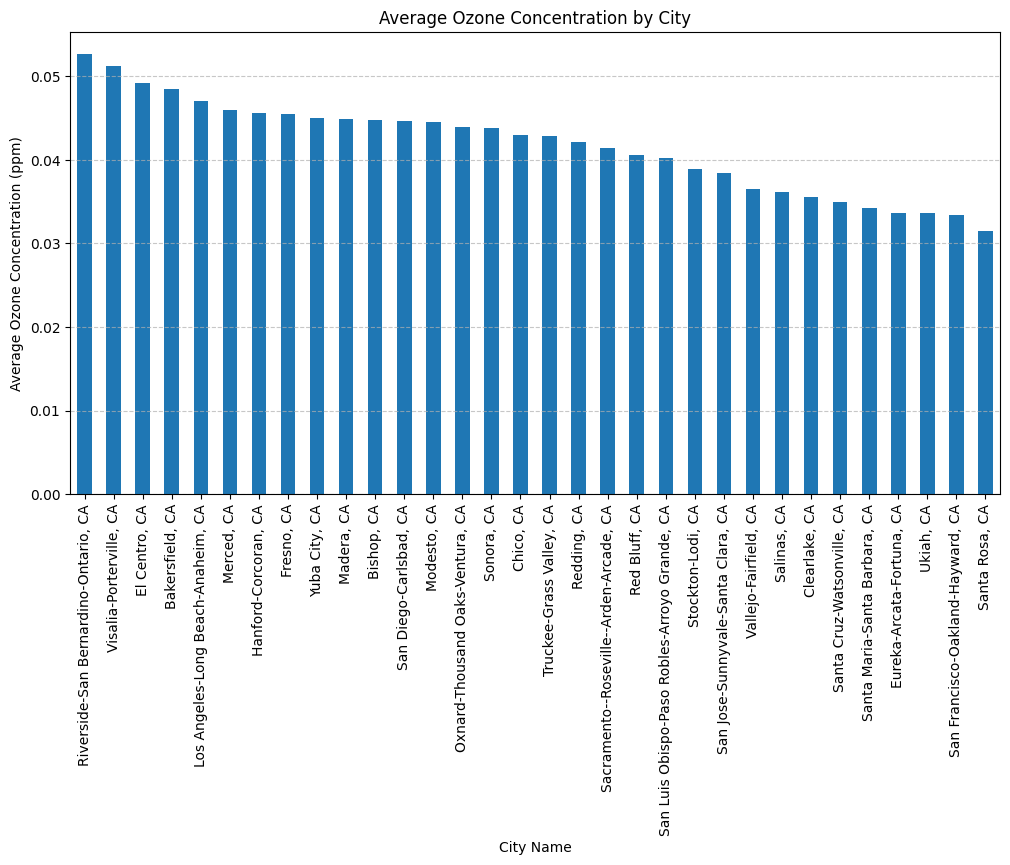

In [61]:
Cities_oz_sorted.plot(kind='bar', figsize=(12, 6))
plt.title('Average Ozone Concentration by City')
plt.ylabel('Average Ozone Concentration (ppm)')
plt.xlabel('City Name')
plt.xticks(rotation=90)
plt.grid(True, alpha=.7, linestyle='--', axis='y')
plt.show()

## Observations
- Highest avereage Ozone levels are in Riverside- San Benardino-Ontario
- Lowest average Ozone levels are in Santa Rosa.

# Explore Method and County

In [62]:
Method_grouped = oz2.groupby('Method Code')['Daily Max 8-hour Ozone Concentration'].mean()

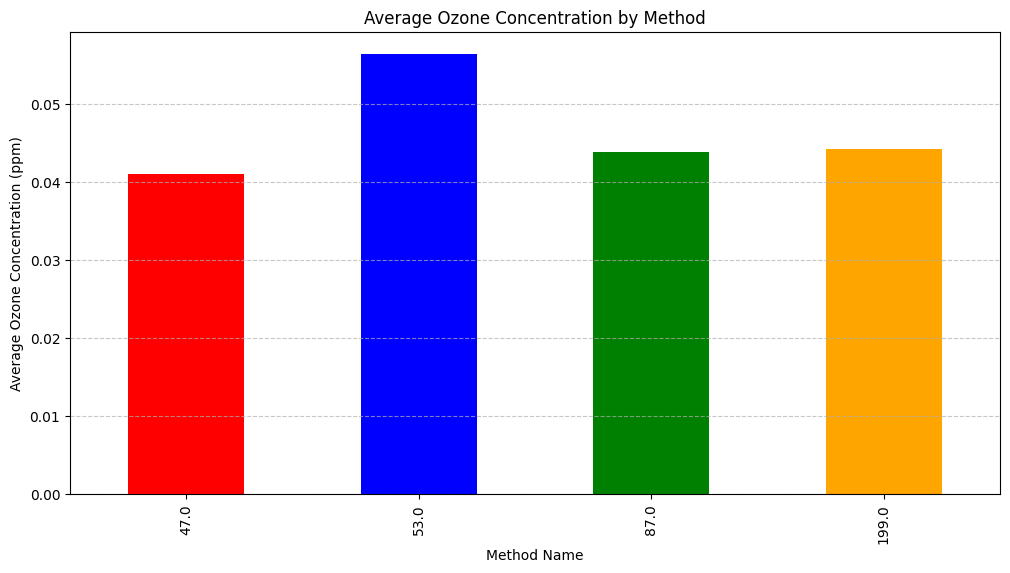

In [63]:
Method_grouped.plot(kind='bar', figsize=(12, 6), color = ['red','blue','green','orange'])
plt.title('Average Ozone Concentration by Method')
plt.ylabel('Average Ozone Concentration (ppm)')
plt.xlabel('Method Name')
plt.xticks(rotation=90)
plt.grid(True, alpha=.7, linestyle='--', axis='y')
plt.show()

## Observation
- Method 53 has the highest average concentration of Ozone. 

# Validate County
- Inconsitencies in Labling of counties

In [96]:
oz2['County'].value_counts()

County
Los Angeles        4282
Riverside          3946
San Bernardino     3242
San Diego          3227
Santa Barbara      3198
Kern               2878
Fresno             2541
San Luis Obispo    2181
Ventura            1833
Placer             1814
Sacramento         1748
Alameda            1354
Tulare             1306
Imperial           1204
Santa Clara        1114
Contra Costa       1105
Monterey           1100
Inyo               1009
Shasta              976
Solano              956
El Dorado           766
Stanislaus          730
Madera              725
Orange              725
San Benito          721
Yolo                720
Butte               719
San Joaquin         716
Sutter              585
Mariposa            585
Tehama              583
Mendocino           446
Merced              375
Siskiyou            371
Santa Cruz          371
Glenn               368
Amador              368
Colusa              366
Tuolumne            365
Kings               363
Nevada              361
Lake     

# Alter Nerd
- Replace LA with Los Angeles and SF with San Francisco

In [64]:
County_grouped = oz2.groupby('County')['Daily Max 8-hour Ozone Concentration'].mean()

In [65]:
County_sorted = County_grouped.sort_values(ascending = False)

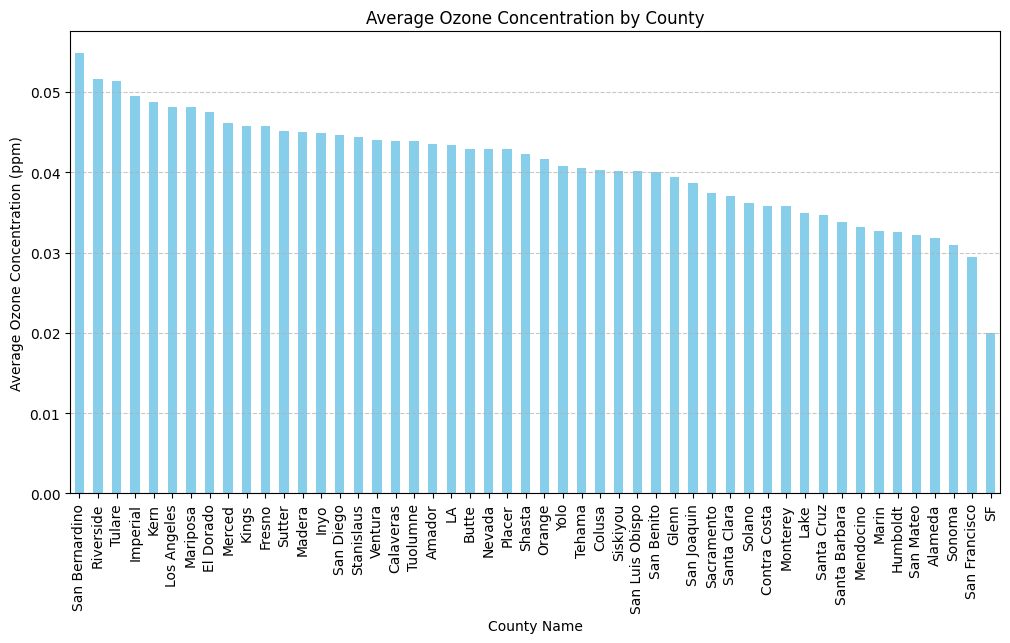

In [66]:
County_sorted.plot(kind='bar', figsize=(12, 6), color = 'skyblue')
plt.title('Average Ozone Concentration by County')
plt.ylabel('Average Ozone Concentration (ppm)')
plt.xlabel('County Name')
plt.xticks(rotation=90)
plt.grid(True, alpha=.7, linestyle='--', axis='y')
plt.show()

# Game Plan for each column
1) Deal with missing values first
2) Check duplicates
3) Use value_counts() for data validation

## Date: Values have to be standardized and filled in 
- Does not have missing values but they are improper format such as '/2024', good thing is that they are sequential so it goes '01/01/2024' then '/2024' then '01/02/2024' ect...
- Additionally some Date values are in the following format 'January /10/2024'.
- I can use a lambda function along with .apply() to help standardize this column. 
 

# 4. Consider if urban activity (weekend vs. weekday) has any affect on ozone levels across different days.

In [ ]:
# Extract day of week as a number 0-6 
oz2['day_of_week'] = oz2['Date'].dt.dayofweek

## Extract Month

In [100]:
oz2['Month'] = oz2['Date'].dt.month

In [69]:
oz2['day_of_week'].head(21)

0     0
1     1
2     2
3     3
4     4
5     5
6     6
7     0
8     1
9     2
10    3
11    4
12    5
13    6
14    0
15    1
16    2
17    3
18    4
19    5
20    6
Name: day_of_week, dtype: int32

In [70]:
#Create a column with name of day of the week 
oz2['day_name'] = oz2['Date'].dt.day_name()

In [72]:
oz2.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,day_of_week,day_name
0,2024-01-01,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,0,Monday
1,2024-01-02,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,1,Tuesday
2,2024-01-03,AQS,60010007,1,0.037,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,2,Wednesday
3,2024-01-04,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,3,Thursday
4,2024-01-05,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,4,Friday


In [73]:
grouped_day = oz2.groupby('day_name')['Daily Max 8-hour Ozone Concentration'].mean()

In [75]:
sorted_day = grouped_day.sort_values(ascending= False)

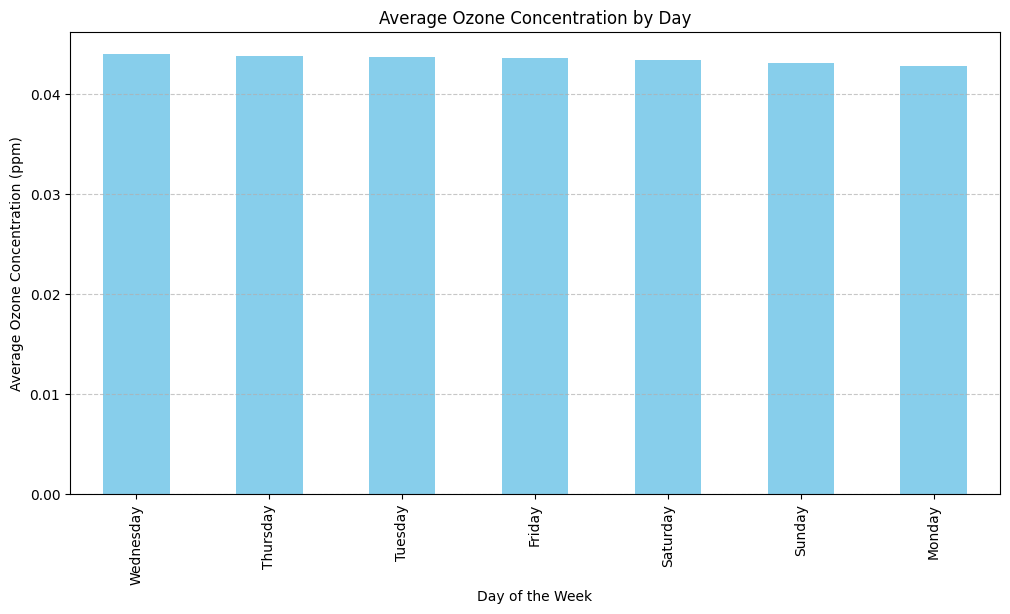

In [78]:
sorted_day.plot(kind='bar', figsize=(12, 6), color = 'skyblue')
plt.title('Average Ozone Concentration by Day')
plt.ylabel('Average Ozone Concentration (ppm)')
plt.xlabel('Day of the Week')
#plt.xticks(rotation=90)
plt.grid(True, alpha=.7, linestyle='--', axis='y')
plt.show()

## Notes
- I should have Y axis start at .03 to zoom in on difference
- Additionally I can run an ANOVA test to see if these differences are statistically significant

In [79]:
sorted_day

day_name
Wednesday    0.044007
Thursday     0.043877
Tuesday      0.043695
Friday       0.043620
Saturday     0.043425
Sunday       0.043152
Monday       0.042784
Name: Daily Max 8-hour Ozone Concentration, dtype: float64

# Notes
- I will have to extract day of the week from Data column
- I should reference my Ultimate inc. project because I did something similar to this date extraction

In [66]:
# Stopped Here 7/29

## Checking Air Quality just for fun

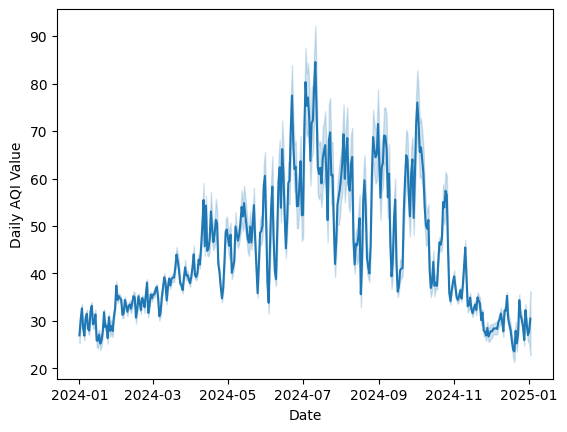

In [80]:
# Visulaizing relationship between Ozone concentration and Date
sns.lineplot(data= oz2, x='Date', y='Daily AQI Value')
plt.show()

In [81]:
oz2['Daily AQI Value'].value_counts()

Daily AQI Value
38.0     4474
31.0     2960
44.0     2339
37.0     1861
36.0     1801
         ... 
227.0       1
223.0       1
214.0       1
212.0       1
236.0       1
Name: count, Length: 120, dtype: int64

In [ ]:
oz2['Daily AQI Value'].mean()

# Average AQI Value is 44.9

44.916068591464416

## Observations
- Warmer months bring lower air quality.

In [83]:
grouped_AQI_day = oz2.groupby('day_name')['Daily AQI Value'].mean()

In [85]:
sorted_AQI_day = grouped_AQI_day.sort_values(ascending= False)

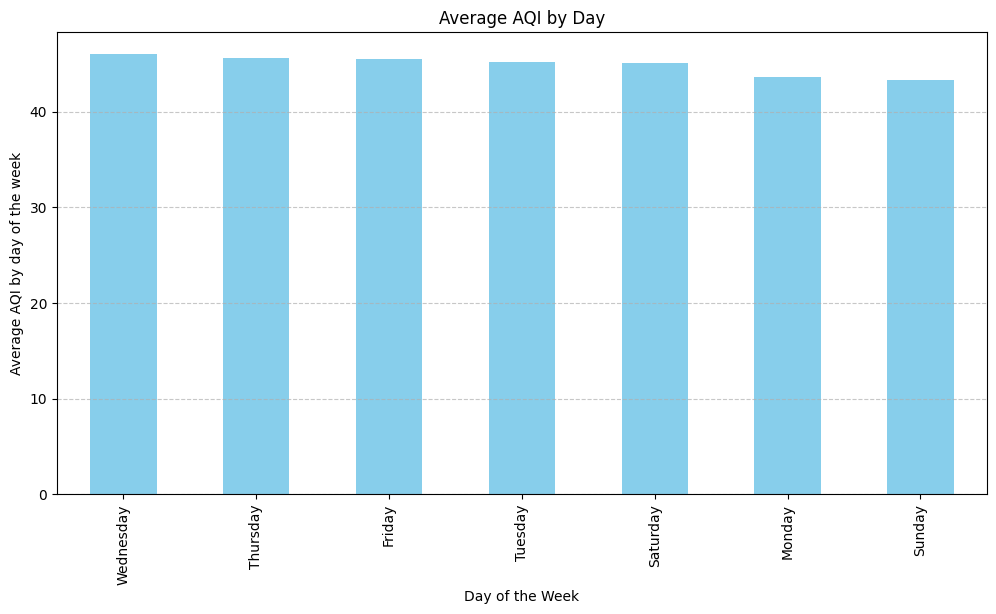

In [86]:
sorted_AQI_day.plot(kind='bar', figsize=(12, 6), color = 'skyblue')
plt.title('Average AQI by Day')
plt.ylabel('Average AQI by day of the week')
plt.xlabel('Day of the Week')
#plt.xticks(rotation=90)
plt.grid(True, alpha=.7, linestyle='--', axis='y')
plt.show()

In [93]:
sorted_AQI_day

day_name
Wednesday    46.011616
Thursday     45.660534
Friday       45.522361
Tuesday      45.202672
Saturday     45.143913
Monday       43.584612
Sunday       43.342984
Name: Daily AQI Value, dtype: float64

# Run Correlation Matrix to spot trends 

In [121]:
oz2.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,day_of_week,day_name,Month
0,2024-01-01,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,0,Monday,1
1,2024-01-02,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,1,Tuesday,1
2,2024-01-03,AQS,60010007,1,0.037,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,2,Wednesday,1
3,2024-01-04,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,3,Thursday,1
4,2024-01-05,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,4,Friday,1


In [114]:
len(oz2['County FIPS Code'].value_counts())

48

In [122]:
corr_oz = oz2.drop(columns=['Date','Source','Site ID','POC','Units','Local Site Name','Daily Obs Count','Percent Complete','CBSA Code','County FIPS Code','County','Site Latitude','Site Longitude','day_name'])

In [123]:
corr_oz.head()

,Daily Max 8-hour Ozone Concentration,Daily AQI Value,Method Code,CBSA Name,day_of_week,Month
0,0.031,29.0,47.0,"San Francisco-Oakland-Hayward, CA",0,1
1,0.037,34.0,47.0,"San Francisco-Oakland-Hayward, CA",1,1
2,0.037,30.0,47.0,"San Francisco-Oakland-Hayward, CA",2,1
3,0.026,24.0,47.0,"San Francisco-Oakland-Hayward, CA",3,1
4,0.027,25.0,47.0,"San Francisco-Oakland-Hayward, CA",4,1


In [124]:
oz_encoded = pd.get_dummies(corr_oz, columns=['CBSA Name'])

In [ ]:
corr_matrix = oz_encoded.corr()

In [ ]:
#corr_matrix = df_encoded.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.show()

## 💪 Competition challenge

Create a report that covers the following:
1. Your EDA and data cleaning process.
2. How does daily maximum 8-hour ozone concentration vary over time and regions?
3. Are there any areas that consistently show high ozone concentrations? Do different methods report different ozone levels?
4. Consider if urban activity (weekend vs. weekday) has any affect on ozone levels across different days.
5. Bonus: plot a geospatial heatmap showing any high ozone concentrations.

# 5. Bonus: Plot a geospatial heatmap showing any high ozone concentrations

In [171]:
import plotly.express as px

# Aggregate by site for cleaner visualization
site_avg = oz2.groupby(['Site Latitude', 'Site Longitude', 'Local Site Name']).agg({
    'Daily Max 8-hour Ozone Concentration': 'mean'
}).reset_index()

# Create scatter plot with color intensity
fig = px.scatter_mapbox(
    site_avg,
    lat='Site Latitude',
    lon='Site Longitude',
    color='Daily Max 8-hour Ozone Concentration',
    size='Daily Max 8-hour Ozone Concentration',
    hover_name='Local Site Name',
    color_continuous_scale='Reds',
    size_max=8,
    zoom=6, 
    center={'lat': 36.7783, 'lon': -119.4179},
    mapbox_style='open-street-map',
    title='California Ozone Concentration Heatmap'
)
fig.update_layout(
    width=1000,    # Width in pixels
    height=800     # Height in pixels
)

fig.show()

In [156]:
oz2.head()

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,day_of_week,day_name,Month
0,2024-01-01,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,0,Monday,1
1,2024-01-02,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,1,Tuesday,1
2,2024-01-03,AQS,60010007,1,0.037,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,2,Wednesday,1
3,2024-01-04,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,3,Thursday,1
4,2024-01-05,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,4,Friday,1


In [172]:
# Aggregate by site for cleaner visualization
site_avg = oz2.groupby(['Site Latitude', 'Site Longitude', 'County']).agg({
    'Daily AQI Value': 'mean'
}).reset_index()

# Create scatter plot with color intensity
fig = px.scatter_mapbox(
    site_avg,
    lat='Site Latitude',
    lon='Site Longitude',
    color='Daily AQI Value',
    size='Daily AQI Value',
    hover_name='County',
    color_continuous_scale='Reds',
    size_max=12,
    zoom=6, 
    center={'lat': 36.7783, 'lon': -119.4179},
    mapbox_style='open-street-map',
    title='California Ozone Concentration Heatmap'
)

fig.update_layout(
    width=1000,    # Width in pixels
    height=800     # Height in pixels
)

fig.show()

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!

# Random Thought
- Do ozone levels increase during thunder storms?
- If so, Thunder Storms during summer months are associated with Wild Fires which are correltated with Lower Air Quality.
- My thinking is Ozone levels could be used to predict Thunder Storms and these in turn could be used to predict most Wildfires. 

# My Story
Every year California suffers from Wild Fires. These Wild Fires devestate forests and at times communities. Wild Fires grow out of control and endager human lives and wild life. Wild fires fill the air with smoke which lowers air quality for surrounding areas.

In 2020 during the peak of the Pandemic my 50% of my home town in Southern Oregon was destroyed by a wild fire. 